# Exploración Inicial de Datos Climáticos

Análisis exploratorio de los datos climáticos descargados para Madrid, Barcelona, París y Londres (2015-2024).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

## 1. Carga de Datos

In [2]:
df = pd.read_csv('../data/raw/climate_data_2015_2024.csv')
df['date'] = pd.to_datetime(df['date'])

print(f"Dimensiones del dataset: {df.shape}")
print(f"Ciudades incluidas: {df['city'].unique().tolist()}")
print(f"Rango temporal: {df['date'].min().date()} a {df['date'].max().date()}")
print(f"Total de días: {df['date'].nunique()}")

Dimensiones del dataset: (14612, 9)
Ciudades incluidas: ['Madrid', 'Barcelona', 'Paris', 'London']
Rango temporal: 2015-01-01 a 2024-12-31
Total de días: 3653


## 2. Estructura y Tipos de Datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14612 entries, 0 to 14611
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            14612 non-null  datetime64[ns]
 1   city            14612 non-null  object        
 2   temp_max        14612 non-null  float64       
 3   temp_min        14612 non-null  float64       
 4   temp_mean       14612 non-null  float64       
 5   precipitation   14612 non-null  float64       
 6   rain            14612 non-null  float64       
 7   wind_speed_max  14612 non-null  float64       
 8   humidity_mean   14612 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 1.0+ MB


In [4]:
df.head()

,date,city,temp_max,temp_min,temp_mean,precipitation,rain,wind_speed_max,humidity_mean
0,2015-01-01,Madrid,9.0,-3.0,2.2,0.0,0.0,7.2,65
1,2015-01-02,Madrid,9.7,-3.5,2.2,0.0,0.0,4.6,70
2,2015-01-03,Madrid,9.6,-1.7,3.2,0.0,0.0,8.0,71
3,2015-01-04,Madrid,12.1,-1.9,4.0,0.0,0.0,5.4,73
4,2015-01-05,Madrid,10.4,0.2,4.4,0.0,0.0,8.4,78


## 3. Análisis de Valores Nulos

In [5]:
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df) * 100).round(2)

null_summary = pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje': null_percentages
})

print(null_summary[null_summary['Valores Nulos'] > 0])

Empty DataFrame
Columns: [Valores Nulos, Porcentaje]
Index: []


## 4. Estadísticas Descriptivas

In [6]:
df.describe()

,date,temp_max,temp_min,temp_mean,precipitation,rain,wind_speed_max,humidity_mean
count,14612,14612.000000,14612.000000,14612.000000,14612.000000,14612.000000,14612.000000,14612.000000
mean,2020-01-01 00:00:00.000000256,18.377354,9.676471,13.930605,1.799234,1.776287,18.676499,71.873734
min,2015-01-01 00:00:00,-2.200000,-11.200000,-5.000000,0.000000,0.000000,3.500000,14.000000
25%,2017-07-02 00:00:00,12.600000,4.900000,8.700000,0.000000,0.000000,13.400000,65.000000
50%,2020-01-01 00:00:00,17.700000,9.300000,13.200000,0.000000,0.000000,17.500000,75.000000
75%,2022-07-02 00:00:00,23.600000,14.400000,18.900000,1.500000,1.400000,22.700000,83.000000
max,2024-12-31 00:00:00,41.300000,26.000000,33.500000,103.700000,103.700000,68.000000,100.000000
std,NaN,7.669705,6.401656,6.958344,4.476956,4.447912,7.229258,15.914627


## 5. Análisis por Ciudad

In [7]:
print("Registros por ciudad:")
print(df['city'].value_counts())

Registros por ciudad:
city
Madrid       3653
Barcelona    3653
Paris        3653
London       3653
Name: count, dtype: int64


In [8]:
city_stats = df.groupby('city').agg({
    'temp_mean': ['mean', 'min', 'max', 'std'],
    'precipitation': ['mean', 'sum', 'max'],
    'humidity_mean': ['mean', 'min', 'max'],
    'wind_speed_max': ['mean', 'max']
}).round(2)

print("\nEstadísticas climáticas por ciudad:")
city_stats


Estadísticas climáticas por ciudad:


temp_mean                  precipitation                 \
               mean  min   max   std          mean     sum    max   
city                                                                
Barcelona     16.53  2.6  31.3  6.10          1.84  6737.2  103.7   
London        11.38 -5.0  29.2  5.50          1.97  7209.2   48.7   
Madrid        15.29 -3.0  33.5  8.20          1.26  4610.8   78.6   
Paris         12.53 -4.8  32.5  6.48          2.12  7733.2   55.8   

          humidity_mean          wind_speed_max        
                   mean min  max           mean   max  
city                                                   
Barcelona         74.43  33   96          16.79  47.3  
London            78.92  37   99          21.73  68.0  
Madrid            58.24  14   96          17.08  48.2  
Paris             75.91  34  100          19.10  52.0

## 6. Visualizaciones

c:\Users\Luis\Desktop\impacto climatico\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Luis\Desktop\impacto climatico\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Luis\Desktop\impacto climatico\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Luis\Desktop\impacto climatico\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

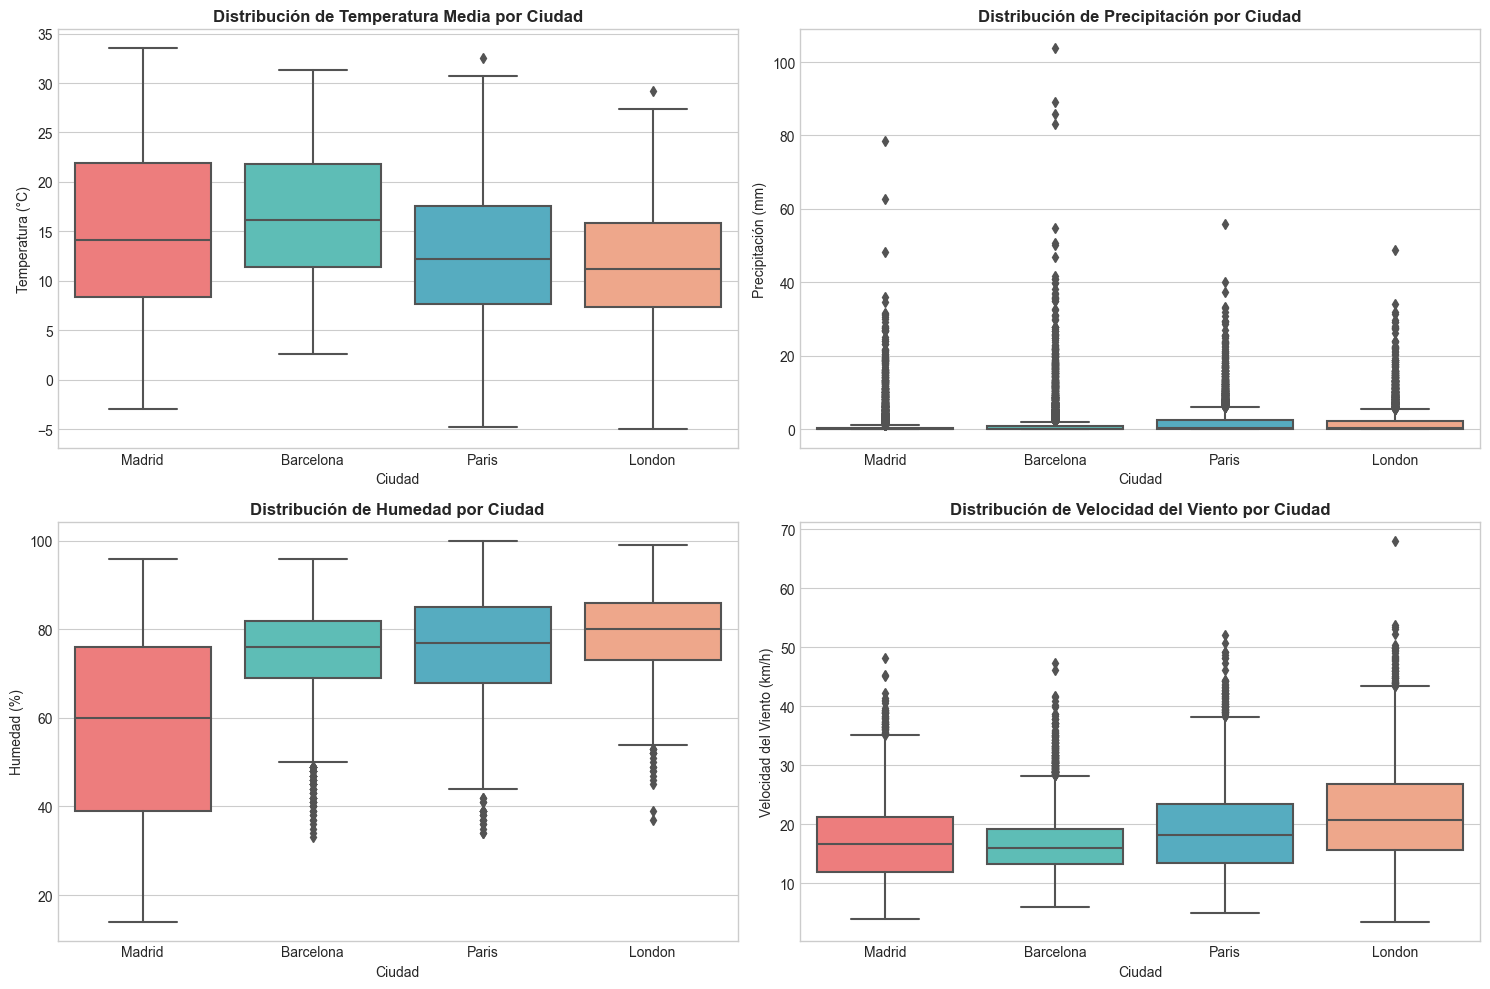

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

sns.boxplot(data=df, x='city', y='temp_mean', ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('Distribución de Temperatura Media por Ciudad', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Ciudad')
axes[0, 0].set_ylabel('Temperatura (°C)')

sns.boxplot(data=df, x='city', y='precipitation', ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('Distribución de Precipitación por Ciudad', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Ciudad')
axes[0, 1].set_ylabel('Precipitación (mm)')

sns.boxplot(data=df, x='city', y='humidity_mean', ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('Distribución de Humedad por Ciudad', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Ciudad')
axes[1, 0].set_ylabel('Humedad (%)')

sns.boxplot(data=df, x='city', y='wind_speed_max', ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('Distribución de Velocidad del Viento por Ciudad', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Ciudad')
axes[1, 1].set_ylabel('Velocidad del Viento (km/h)')

plt.tight_layout()
plt.savefig('../reports/figures/climate_distributions_by_city.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Series Temporales

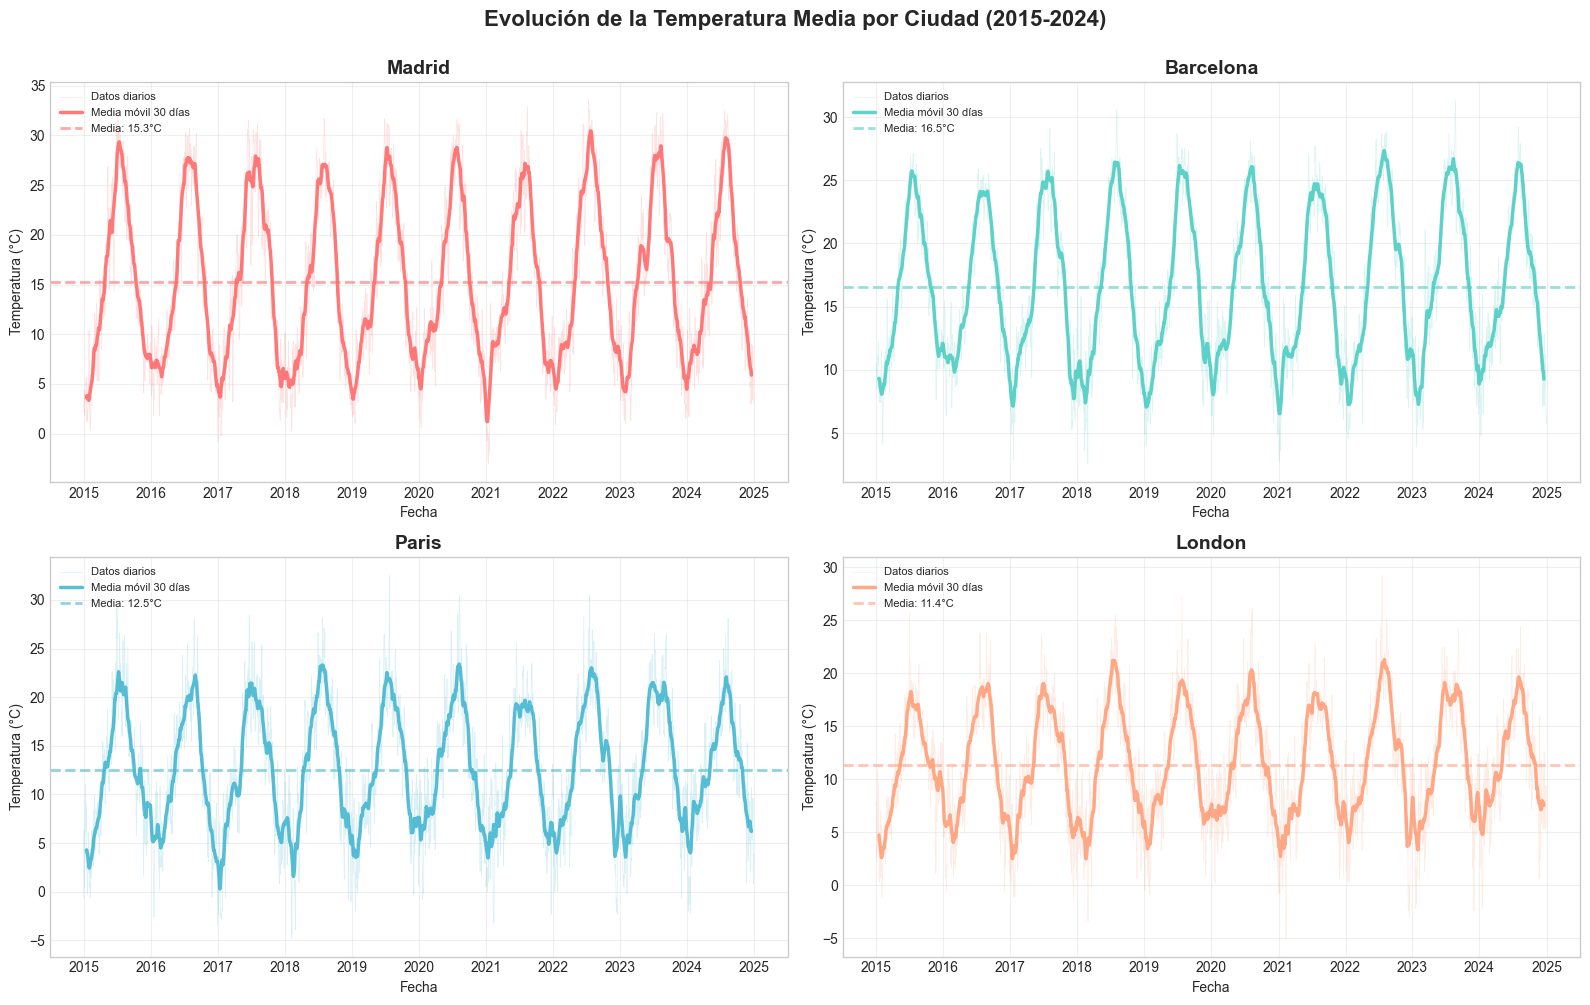

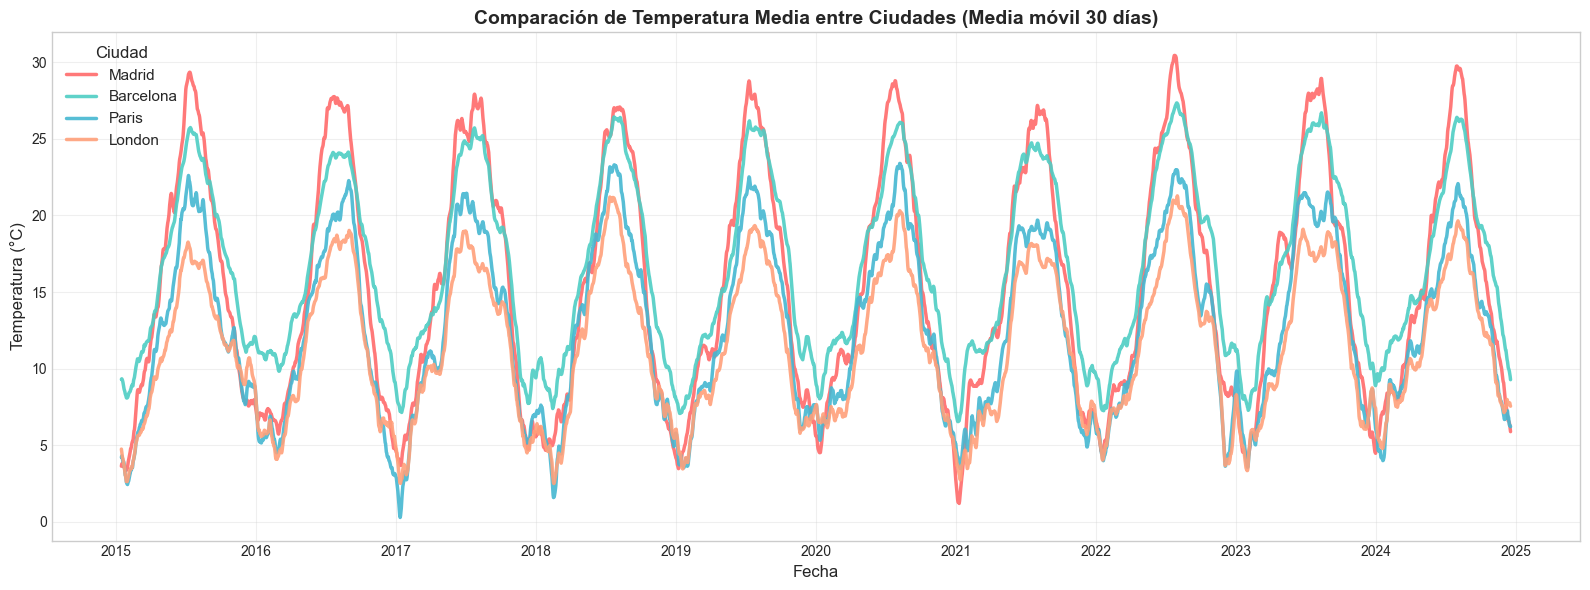

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

cities = df['city'].unique()
colors_temp = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for i, (city, color) in enumerate(zip(cities, colors_temp)):
    city_data = df[df['city'] == city].sort_values('date')
    
    axes[i].plot(city_data['date'], city_data['temp_mean'], 
                 color=color, linewidth=0.5, alpha=0.2, label='Datos diarios')
    
    city_data_smooth = city_data.set_index('date')['temp_mean'].rolling(window=30, center=True).mean()
    axes[i].plot(city_data_smooth.index, city_data_smooth.values, 
                 color=color, linewidth=2.5, alpha=0.9, label='Media móvil 30 días')
    
    axes[i].set_title(f'{city}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Fecha', fontsize=10)
    axes[i].set_ylabel('Temperatura (°C)', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    
    mean_temp = city_data['temp_mean'].mean()
    axes[i].axhline(y=mean_temp, color=color, linestyle='--', alpha=0.6, linewidth=2,
                    label=f'Media: {mean_temp:.1f}°C')
    axes[i].legend(loc='upper left', fontsize=8)

plt.suptitle('Evolución de la Temperatura Media por Ciudad (2015-2024)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../reports/figures/temperature_evolution_by_city.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(16, 6))

for city, color in zip(cities, colors_temp):
    city_data = df[df['city'] == city].sort_values('date')
    city_data_smooth = city_data.set_index('date')['temp_mean'].rolling(window=30, center=True).mean()
    ax.plot(city_data_smooth.index, city_data_smooth.values, 
            label=city, color=color, linewidth=2.5, alpha=0.9)

ax.set_title('Comparación de Temperatura Media entre Ciudades (Media móvil 30 días)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Temperatura (°C)', fontsize=12)
ax.legend(title='Ciudad', fontsize=11, title_fontsize=12, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/temperature_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Análisis de Correlaciones

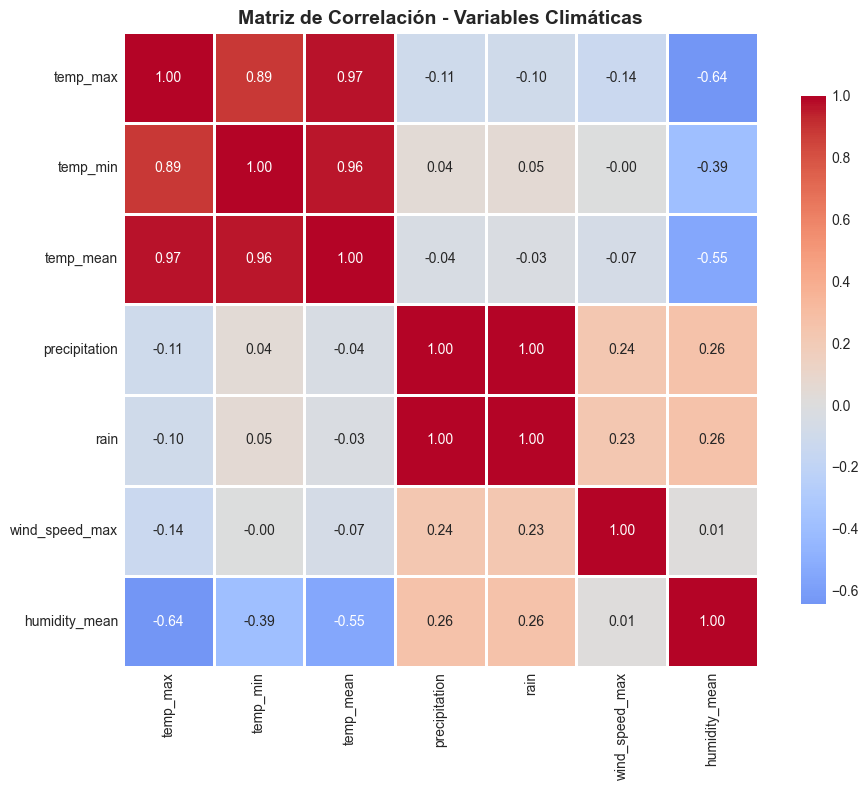

In [11]:
correlation_cols = ['temp_max', 'temp_min', 'temp_mean', 'precipitation', 'rain', 'wind_speed_max', 'humidity_mean']
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Climáticas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
print("OBSERVACIONES:")
print("\n→ Temperatura:")
print(f"  - Ciudad más cálida: {city_stats['temp_mean']['mean'].idxmax()} ({city_stats['temp_mean']['mean'].max():.1f}°C)")
print(f"  - Ciudad más fría: {city_stats['temp_mean']['mean'].idxmin()} ({city_stats['temp_mean']['mean'].min():.1f}°C)")

print("\n→ Precipitación:")
print(f"  - Ciudad más lluviosa: {city_stats['precipitation']['sum'].idxmax()} ({city_stats['precipitation']['sum'].max():.0f} mm total)")
print(f"  - Ciudad más seca: {city_stats['precipitation']['sum'].idxmin()} ({city_stats['precipitation']['sum'].min():.0f} mm total)")

print("\n→ Correlaciones fuertes detectadas:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7 and abs(corr_value) < 1.0:
            print(f"  - {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_value:.2f}")



OBSERVACIONES:

→ Temperatura:
  - Ciudad más cálida: Barcelona (16.5°C)
  - Ciudad más fría: London (11.4°C)

→ Precipitación:
  - Ciudad más lluviosa: Paris (7733 mm total)
  - Ciudad más seca: Madrid (4611 mm total)

→ Correlaciones fuertes detectadas:
  - temp_max ↔ temp_min: 0.89
  - temp_max ↔ temp_mean: 0.97
  - temp_min ↔ temp_mean: 0.96
  - precipitation ↔ rain: 1.00
